<a href="https://colab.research.google.com/github/shubhkhandare/TextTransOCR/blob/main/PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install and Import Dependencies


In [1]:
!python3 -m pip install paddlepaddle-gpu -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [2]:
!pip install paddleocr

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR


fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [4]:
!pip install googletrans==4.0.0-rc1


# IMPORT




[2024/06/15 04:07:52] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

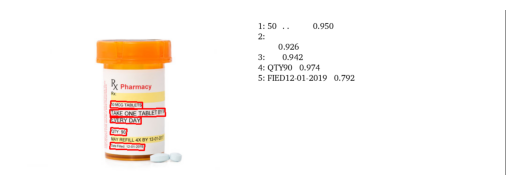

In [19]:
from paddleocr import PaddleOCR, draw_ocr
from googletrans import Translator
import matplotlib.pyplot as plt
from PIL import Image

# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Initialize the translator
translator = Translator()

# Path to the image file
img_path = '/content/drug1.jpg'

# Perform OCR on the image
result = ocr.ocr(img_path, cls=True)

# Extract the detected text
detected_texts = [elements[1][0] for line in result for elements in line]

# Define a function to translate text into chosen languages
def translate_texts(detected_texts, target_languages):
    translations = {lang: [translator.translate(text, dest=lang).text for text in detected_texts] for lang in target_languages}
    return translations

# Define target languages for translation
target_languages = ['mr', 'hi', 'ta']  # Marathi, Hindi, Tamil

# Translate the detected text into multiple languages
translations = translate_texts(detected_texts, target_languages)

# Print the translations
for lang in target_languages:
    print(f"Translations in {lang}:")
    for original, translated in zip(detected_texts, translations[lang]):
        print(f'Original: {original} -> Translated: {translated}')
    print()

# Interactive language selection
selected_language = input("Choose the language to visualize (mr for Marathi, hi for Hindi, ta for Tamil): ")

if selected_language not in target_languages:
    print("Invalid language choice. Please run the script again and select a valid language.")
else:
    translated_texts = translations[selected_language]

    # Draw the results on the image
    font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')



    image = Image.open(img_path).convert('RGB')
    boxes = [elements[0] for line in result for elements in line]
    scores = [elements[1][1] for line in result for elements in line]
    im_show = draw_ocr(image, boxes, translated_texts, scores, font_path=font_path)
    im_show = Image.fromarray(im_show)

    # Display the image with translated text
    plt.imshow(im_show)
    plt.axis('off')
    plt.show()
